# Isomap examples

In [2]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from d_and_c.methods import isomap
from d_and_c.utils import benchmark, runif_in_tetrahedron
from scipy.spatial.distance import pdist, squareform

np.random.seed(42)

## 1. Tetrahedron

### 1.1 Tetrahedron vertices

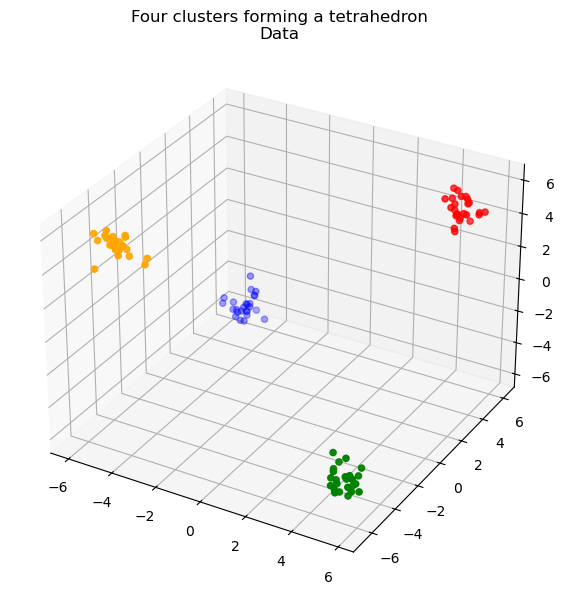

In [3]:
## Generate data
n_points = 100
points_per_cluster = n_points // 4

# Define vertices of a tetrahedron
vertices = np.array([
    [1, 1, 1],
    [1, -1, -1],
    [-1, 1, -1],
    [-1, -1, 1]
]) * 5


# Generate clusters with gaussian noise around each vertex
clusters = []
for vertex in vertices:
    cluster = np.random.randn(points_per_cluster, 3) * 0.5 + vertex
    clusters.append(cluster)
tetrahedron = np.vstack(clusters)

colors = ['red', 'green', 'blue', 'orange']
cluster_colors = np.repeat(colors, points_per_cluster)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tetrahedron[:,0], tetrahedron[:,1], tetrahedron[:,2],
            color=cluster_colors)
ax.set_title('Four clusters forming a tetrahedron\nData')
plt.show()

In [4]:
distances = squareform(pdist(vertices)); distances

array([[ 0.        , 14.14213562, 14.14213562, 14.14213562],
       [14.14213562,  0.        , 14.14213562, 14.14213562],
       [14.14213562, 14.14213562,  0.        , 14.14213562],
       [14.14213562, 14.14213562, 14.14213562,  0.        ]])

In [ ]:
# Apply Isomap
%time tetrahedron_embedding_1 = isomap(tetrahedron, r=2, n_neighbors=3)
%time tetrahedron_embedding_2 = isomap(tetrahedron, r=2, n_neighbors=5)
%time tetrahedron_embedding_3 = isomap(tetrahedron, r=2, n_neighbors=7)
%time tetrahedron_embedding_4 = isomap(tetrahedron, r=2, n_neighbors=9)

CPU times: user 31.2 ms, sys: 5.89 ms, total: 37.1 ms
Wall time: 16.2 ms
CPU times: user 67.3 ms, sys: 31.5 ms, total: 98.8 ms
Wall time: 26.1 ms
CPU times: user 58.2 ms, sys: 9.18 ms, total: 67.4 ms
Wall time: 9.07 ms
CPU times: user 31.3 ms, sys: 166 μs, total: 31.5 ms
Wall time: 5.12 ms


/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/anaconda3/lib/pyth

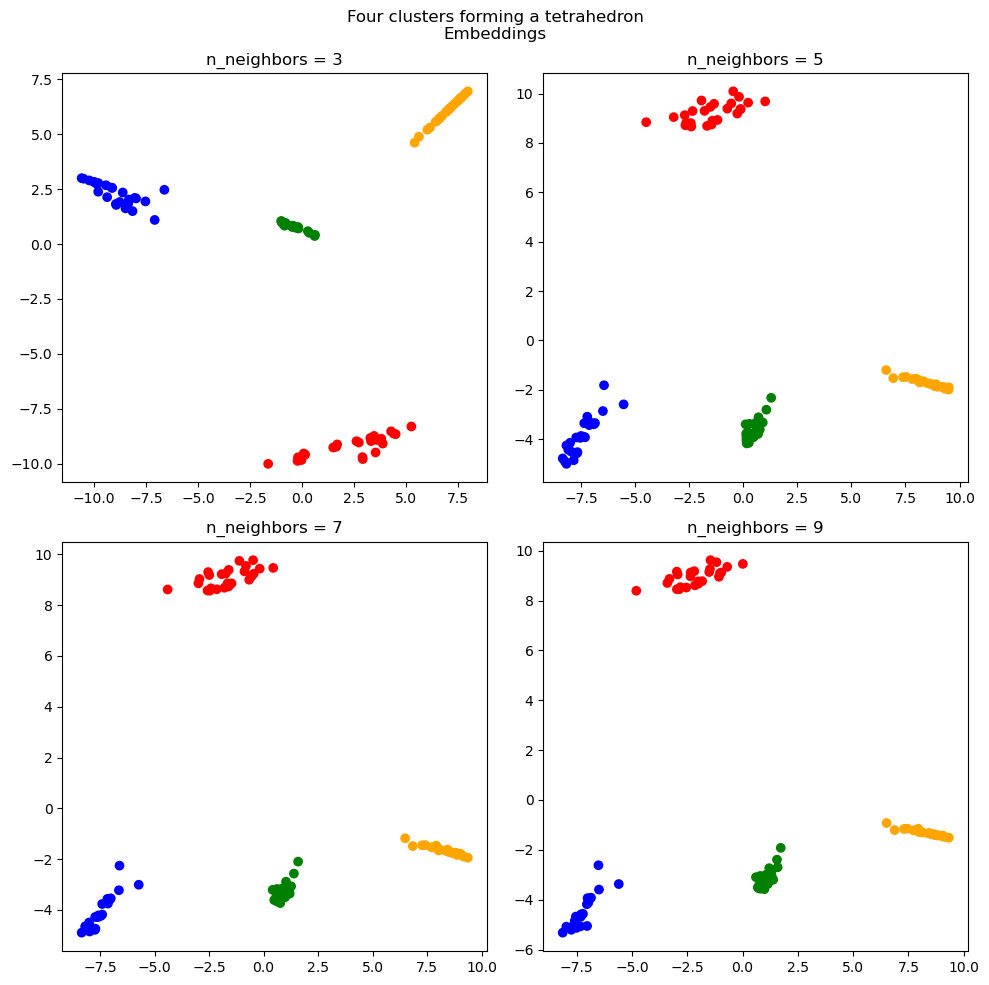

In [ ]:
# Plot the Isomap embeddings
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Four clusters forming a tetrahedron\nEmbeddings')

ax1 = fig.add_subplot(221)
ax1.scatter(tetrahedron_embedding_1[:, 0], tetrahedron_embedding_1[:, 1],
            c=cluster_colors)
ax1.set_title('n_neighbors = 3')

ax2 = fig.add_subplot(222)
ax2.scatter(tetrahedron_embedding_2[:, 0], tetrahedron_embedding_2[:, 1],
            c=cluster_colors)
ax2.set_title('n_neighbors = 5')

ax3 = fig.add_subplot(223)
ax3.scatter(tetrahedron_embedding_3[:, 0], tetrahedron_embedding_3[:, 1],
            c=cluster_colors)
ax3.set_title('n_neighbors = 7')

ax4 = fig.add_subplot(224)
ax4.scatter(tetrahedron_embedding_4[:, 0], tetrahedron_embedding_4[:, 1],
            c=cluster_colors)
ax4.set_title('n_neighbors = 9')

fig.tight_layout()

It looks like slight changes in the dataset can vary the vertices order. Let us generate more datasets and see if opposite vertices can become adjacent.

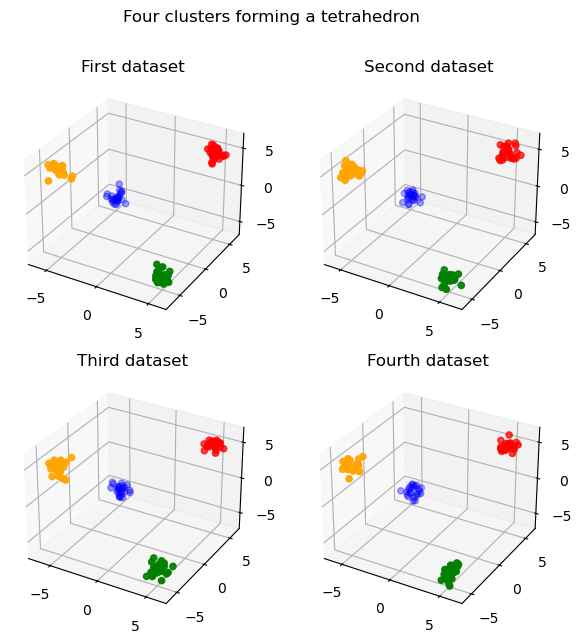

In [10]:
# Generate new datasets
clusters2 = []
for vertex in vertices:
    cluster = np.random.randn(points_per_cluster, 3) * 0.5 + vertex
    clusters2.append(cluster)
tetrahedron2 = np.vstack(clusters2)

clusters3 = []
for vertex in vertices:
    cluster = np.random.randn(points_per_cluster, 3) * 0.5 + vertex
    clusters3.append(cluster)
tetrahedron3 = np.vstack(clusters3)

clusters4 = []
for vertex in vertices:
    cluster = np.random.randn(points_per_cluster, 3) * 0.5 + vertex
    clusters4.append(cluster)
tetrahedron4 = np.vstack(clusters4)

fig = plt.figure(figsize=(7, 7))
fig.suptitle('Four clusters forming a tetrahedron')

ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(tetrahedron[:, 0], tetrahedron[:, 1], tetrahedron[:, 2],
           color=cluster_colors)
ax1.set_title('First dataset')

ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(tetrahedron2[:, 0], tetrahedron2[:, 1], tetrahedron2[:, 2],
            color=cluster_colors)
ax2.set_title('Second dataset')

ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(tetrahedron3[:, 0], tetrahedron3[:, 1], tetrahedron3[:, 2],
            color=cluster_colors)
ax3.set_title('Third dataset')

ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(tetrahedron4[:, 0], tetrahedron4[:, 1], tetrahedron4[:, 2],
            color=cluster_colors)
ax4.set_title('Fourth dataset')
plt.show()

In [14]:
# Apply Isomap to different datasets
%time tetrahedron1_embedding = isomap(tetrahedron, r=2, n_neighbors=7)
%time tetrahedron2_embedding = isomap(tetrahedron2, r=2, n_neighbors=7)
%time tetrahedron3_embedding = isomap(tetrahedron3, r=2, n_neighbors=7)
%time tetrahedron4_embedding = isomap(tetrahedron4, r=2, n_neighbors=7)

CPU times: user 26.8 ms, sys: 9.37 ms, total: 36.2 ms
Wall time: 15.9 ms
CPU times: user 28.6 ms, sys: 36.5 ms, total: 65.1 ms
Wall time: 10 ms
CPU times: user 47.7 ms, sys: 1.2 ms, total: 48.9 ms
Wall time: 8.21 ms
CPU times: user 45.1 ms, sys: 118 μs, total: 45.2 ms
Wall time: 5.01 ms


/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/anaconda3/lib/pyth

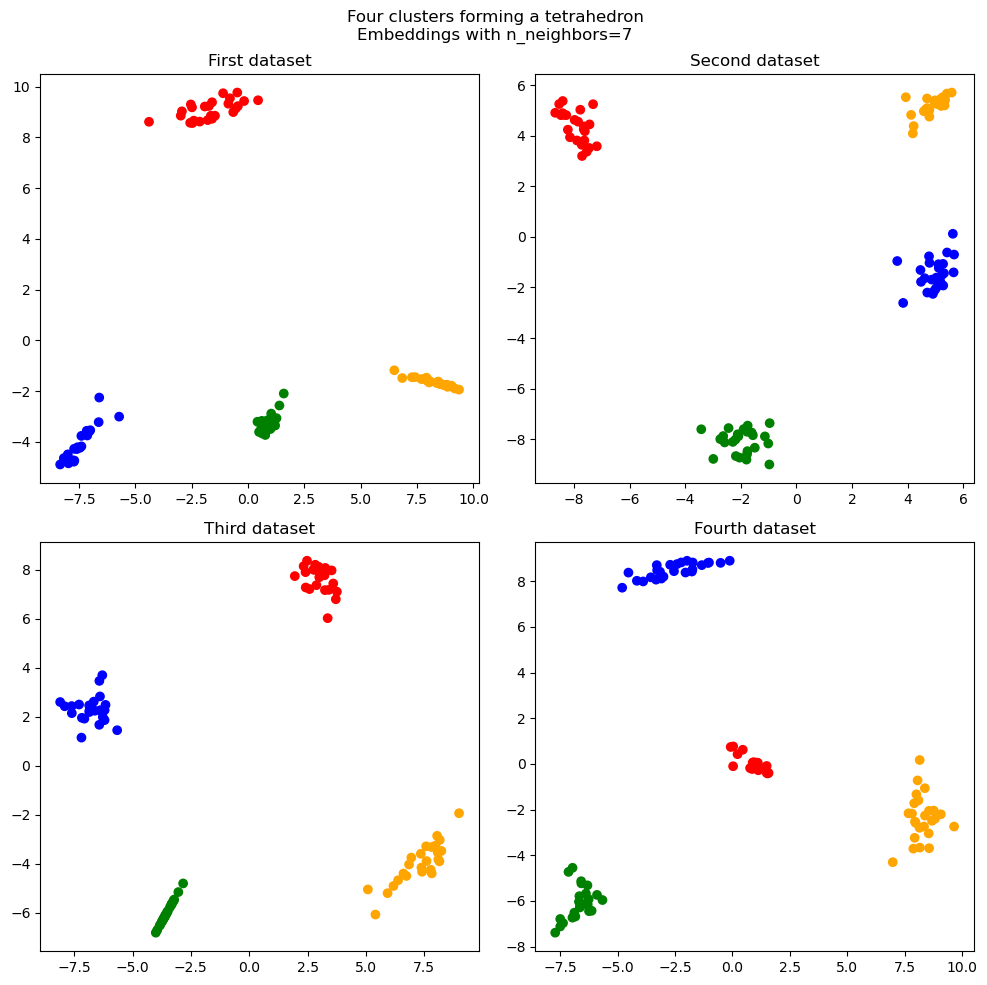

In [15]:
# Plot the Isomap embeddings of the four datasets
fig = plt.figure(figsize=(10, 10))
fig.suptitle(
    'Four clusters forming a tetrahedron\nEmbeddings with n_neighbors=7')

ax1 = fig.add_subplot(221)
ax1.scatter(tetrahedron1_embedding[:, 0], tetrahedron1_embedding[:, 1],
            c=cluster_colors)
ax1.set_title('First dataset')

ax2 = fig.add_subplot(222)
ax2.scatter(tetrahedron2_embedding[:, 0], tetrahedron2_embedding[:, 1],
            c=cluster_colors)
ax2.set_title('Second dataset')

ax3 = fig.add_subplot(223)
ax3.scatter(tetrahedron3_embedding[:, 0], tetrahedron3_embedding[:, 1],
            c=cluster_colors)
ax3.set_title('Third dataset')

ax4 = fig.add_subplot(224)
ax4.scatter(tetrahedron4_embedding[:, 0], tetrahedron4_embedding[:, 1],
            c=cluster_colors)
ax4.set_title('Fourth dataset')

fig.tight_layout()

Note that clusters are disconnected in the kNN graph, so they have been connected with the shortest edges in order to compute geodesic paths between vertices.
Indeed, we can conclude that slight changes in the dataset can producde significant changes in the embedding. In this case, variations in the noise of each vertex of the tetrahedron may embed a pair of vertices in the high-dimensional space into opposite or adjacent vertices of a square (or even not form a square). This happens both with t-SNE and Isomap.

### 3.1 Solid tetrahedron

In [4]:
# Define vertices of a regular tetrahedron with v1 at the origin
vertices = np.array([[0, 0, 0],
                     [1, 0, 0],
                     [0.5, np.sqrt(3)/2, 0],
                     [0.5, np.sqrt(3)/6, np.sqrt(6)/3]
                     ])

# Check the tetrahedron in regular
dist_matrix = squareform(pdist(vertices))
print("Distance matrix between vertices:\n", dist_matrix)

Distance matrix between vertices:
 [[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]]


In [5]:
# Sample points uniformly at random inside the tetrahedron
solid_tetrahedron = runif_in_tetrahedron(1000, vertices)

In [6]:
# Compute the closest vertex for each point in sims
def get_point_colors(solid_tetrahedron):
    # Use NumPy broadcasting to compute distance between the i-th point and the j-th vertex
    distances = np.linalg.norm(
        solid_tetrahedron[:, None, :] - vertices[None, :, :], axis=2)
    closest_vertex = np.argmin(distances, axis=1)

    # Define a color map
    colors_map = np.array(['red', 'green', 'blue', 'orange'])
    point_colors = colors_map[closest_vertex]
    return point_colors
point_colors = get_point_colors(solid_tetrahedron)

In [7]:
# Plot Data in Tetrahedron Mesh
# i, j, k are the indices of the tetrahedron vertices that make up the x, y, z coordinates of the faces' vertices
fig = go.Figure(data=[
    go.Mesh3d(
        x=vertices[:, 0],
        y=vertices[:, 1],
        z=vertices[:, 2],
        i=[0, 0, 0, 1],
        j=[1, 1, 2, 2],
        k=[2, 3, 3, 3],
        color='grey',
        opacity=0.2,
        name='Tetrahedron'
    ),
    go.Scatter3d(
        x=solid_tetrahedron[:, 0],
        y=solid_tetrahedron[:, 1],
        z=solid_tetrahedron[:, 2],
        mode='markers',
        marker=dict(size=3, color=point_colors),
        name='Random Points'
    )
])

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='cube'
    ),
    title="Solid regular tetrahedron: Data"
)

fig.show()

In [13]:
# Find the best value of n_neighbors for a solid tetrahedron
%time solid_embedding_n_neighbors3 = isomap(solid_tetrahedron4, r=2, n_neighbors = 3)
%time solid_embedding_n_neighbors5 = isomap(solid_tetrahedron, r=2, n_neighbors = 5)
%time solid_embedding_n_neighbors7 = isomap(solid_tetrahedron2, r=2, n_neighbors = 7)
%time solid_embedding_n_neighbors9 = isomap(solid_tetrahedron3, r=2, n_neighbors = 9)

CPU times: user 156 ms, sys: 4.95 ms, total: 161 ms
Wall time: 155 ms
CPU times: user 1.33 s, sys: 584 ms, total: 1.92 s
Wall time: 256 ms
CPU times: user 742 ms, sys: 1.34 s, total: 2.08 s
Wall time: 277 ms
CPU times: user 1 s, sys: 1.13 s, total: 2.13 s
Wall time: 293 ms


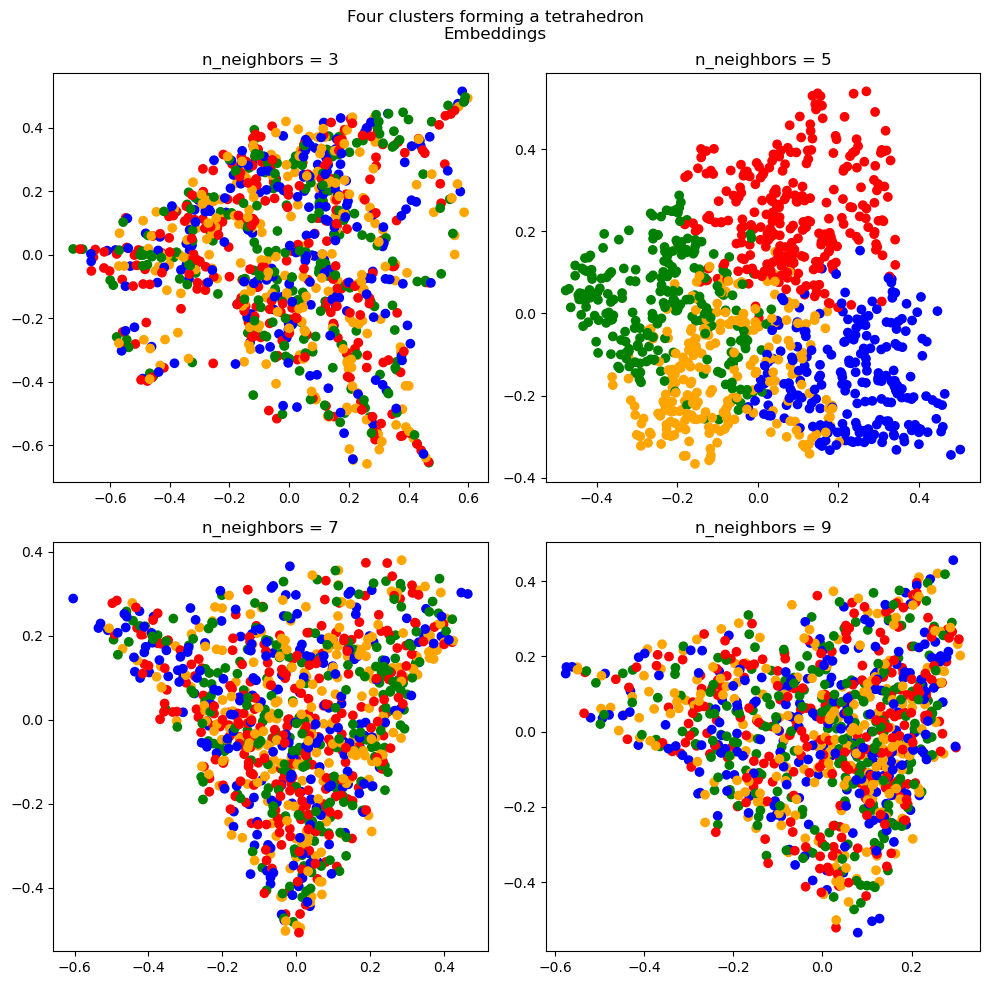

In [14]:
# Plot the Isomap embeddings
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Four clusters forming a tetrahedron\nEmbeddings')

ax1 = fig.add_subplot(221)
ax1.scatter(solid_embedding_n_neighbors3[:, 0], solid_embedding_n_neighbors3[:, 1],
            c=point_colors)
ax1.set_title('n_neighbors = 3')

ax2 = fig.add_subplot(222)
ax2.scatter(solid_embedding_n_neighbors5[:, 0], solid_embedding_n_neighbors5[:, 1],
            c=point_colors)
ax2.set_title('n_neighbors = 5')

ax3 = fig.add_subplot(223)
ax3.scatter(solid_embedding_n_neighbors7[:, 0], solid_embedding_n_neighbors7[:, 1],
            c=point_colors)
ax3.set_title('n_neighbors = 7')

ax4 = fig.add_subplot(224)
ax4.scatter(solid_embedding_n_neighbors9[:, 0], solid_embedding_n_neighbors9[:, 1],
            c=point_colors)
ax4.set_title('n_neighbors = 9')

fig.tight_layout()

Let us try two more n_neighbors values.

In [15]:
# Test n_neighbors = 4, 6
%time solid_embedding_n_neighbors4 = isomap(solid_tetrahedron4, r=2, n_neighbors = 4)
%time solid_embedding_n_neighbors6 = isomap(solid_tetrahedron, r=2, n_neighbors = 6)

CPU times: user 208 ms, sys: 6.89 ms, total: 215 ms
Wall time: 206 ms
CPU times: user 1.29 s, sys: 722 ms, total: 2.01 s
Wall time: 273 ms


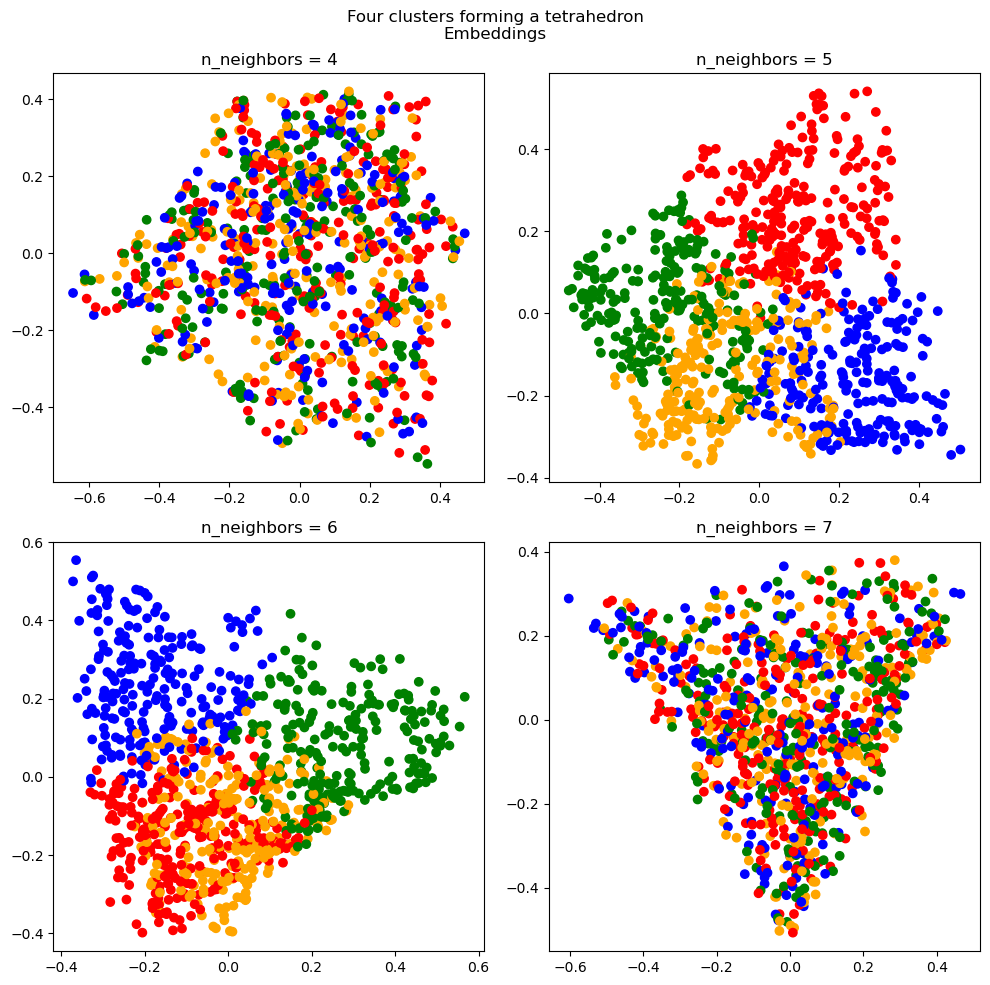

In [17]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Four clusters forming a tetrahedron\nEmbeddings')

ax1 = fig.add_subplot(221)
ax1.scatter(solid_embedding_n_neighbors4[:, 0], solid_embedding_n_neighbors4[:, 1],
            c=point_colors)
ax1.set_title('n_neighbors = 4')

ax2 = fig.add_subplot(222)
ax2.scatter(solid_embedding_n_neighbors5[:, 0], solid_embedding_n_neighbors5[:, 1],
            c=point_colors)
ax2.set_title('n_neighbors = 5')

ax3 = fig.add_subplot(223)
ax3.scatter(solid_embedding_n_neighbors6[:, 0], solid_embedding_n_neighbors6[:, 1],
            c=point_colors)
ax3.set_title('n_neighbors = 6')

ax4 = fig.add_subplot(224)
ax4.scatter(solid_embedding_n_neighbors7[:, 0], solid_embedding_n_neighbors7[:, 1],
            c=point_colors)
ax4.set_title('n_neighbors = 7')

fig.tight_layout()

On the first solid tetrahedorn, the best embedding is obtained when n_neighbors = 5.

In [ ]:
# Generate four solid tetrahedrons and compare its Isomap embeddings
solid_tetrahedron2 = runif_in_tetrahedron(1000, vertices)
solid_tetrahedron3 = runif_in_tetrahedron(1000, vertices)
solid_tetrahedron4 = runif_in_tetrahedron(1000, vertices)

In [9]:
# Compute closest vertex
point_colors2 = get_point_colors(solid_tetrahedron2)
point_colors3 = get_point_colors(solid_tetrahedron3)
point_colors4 = get_point_colors(solid_tetrahedron4)

In [18]:
# Apply Isomap
%time solid_tetrahedron_embedding1 = isomap(solid_tetrahedron, r=2, n_neighbors=5)
%time solid_tetrahedron_embedding2 = isomap(solid_tetrahedron2, r=2, n_neighbors=5)
%time solid_tetrahedron_embedding3 = isomap(solid_tetrahedron3, r=2, n_neighbors=5)
%time solid_tetrahedron_embedding4 = isomap(solid_tetrahedron4, r=2, n_neighbors=5)

CPU times: user 197 ms, sys: 5.31 ms, total: 202 ms
Wall time: 190 ms
CPU times: user 1.4 s, sys: 480 ms, total: 1.88 s
Wall time: 252 ms
CPU times: user 995 ms, sys: 950 ms, total: 1.95 s
Wall time: 254 ms
CPU times: user 1.05 s, sys: 867 ms, total: 1.91 s
Wall time: 247 ms


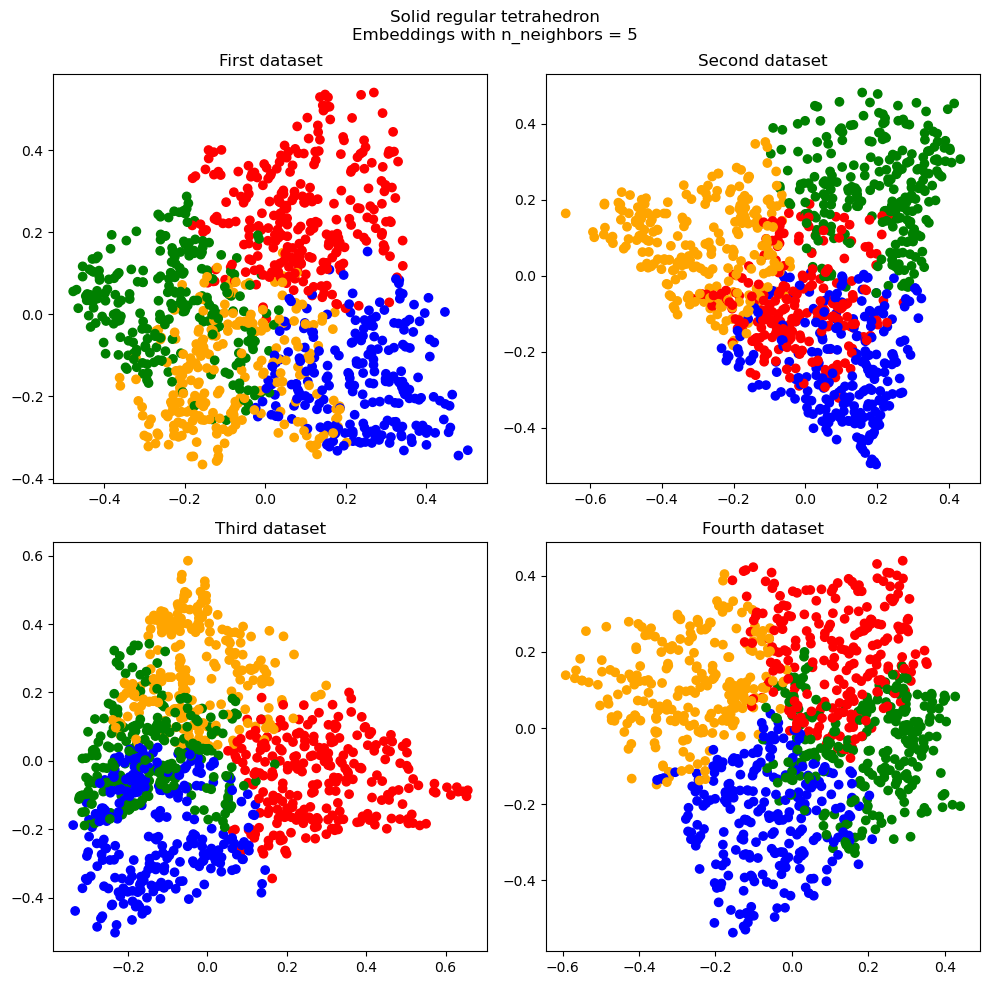

In [19]:
# Plot solid tetrahedron embeddings
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Solid regular tetrahedron\nEmbeddings with n_neighbors = 5')

ax1 = fig.add_subplot(221)
ax1.scatter(solid_tetrahedron_embedding1[:, 0], solid_tetrahedron_embedding1[:, 1],
            c=point_colors)
ax1.set_title('First dataset')

ax2 = fig.add_subplot(222)
ax2.scatter(solid_tetrahedron_embedding2[:, 0], solid_tetrahedron_embedding2[:, 1],
            c=point_colors2)
ax2.set_title('Second dataset')

ax3 = fig.add_subplot(223)
ax3.scatter(solid_tetrahedron_embedding3[:, 0], solid_tetrahedron_embedding3[:, 1],
            c=point_colors3)
ax3.set_title('Third dataset')

ax4 = fig.add_subplot(224)
ax4.scatter(solid_tetrahedron_embedding4[:, 0], solid_tetrahedron_embedding4[:, 1],
            c=point_colors4)
ax4.set_title('Fourth dataset')
fig.tight_layout()

Again, results are similar to those observed in t-SNE. That is, oposite vertices are not consistent with respect to changes in the noise of the dataset. Moreover, in a solid tetrahedron, the kNN graph is connected, so the algorithm has not been modified as in the previous experiment with data around the tetrahedron' vertices.